In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from random import choice
import copy

%matplotlib inline



In [2]:
path = 'creditcard.csv'
data = pd.read_csv(path)

In [3]:
data.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data = data.drop(['Time'], axis=1)

In [6]:
# hyper-parameters
synt_children = 1 # Number of new data pointsto create from each existing data point
k_nn = 10 # K neighbors number

# output size
real_data_np = data.values
synt_data = []

In [7]:
# learn nearest neighbours
model = NearestNeighbors(n_neighbors=k_nn)
model.fit(real_data_np)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [8]:
# Create Laplace noise for each entry
loc, scale = 0., 1.
noise = np.random.laplace(loc, scale, len(real_data_np))

In [9]:
for i, sample in enumerate(real_data_np):
    # Get neighbors of each entry
    nn = model.kneighbors([sample], return_distance=False)[0]
    
    # Get a random neighbor, excepth the entry itself 
    while True:
        rand_neighbor_index = choice(nn)
        if i!=rand_neighbor_index:
            break

    rand_neighbor = real_data_np[rand_neighbor_index, :]

    # Create a sythetic copy of the entry using Laplace noise and the distance between itself and its neighbor 
    new_sample = sample + noise[i] * (rand_neighbor - sample)
    
    # Now the Class column is not binary anymore. Make it binary again
    new_sample[...,-1] = 1.0 if new_sample[...,-1] >= 0.5 else 0.0
    synt_data.append(new_sample)

In [10]:
synt_data_frame = pd.DataFrame(synt_data, columns=data.describe().columns)

Original data distribution


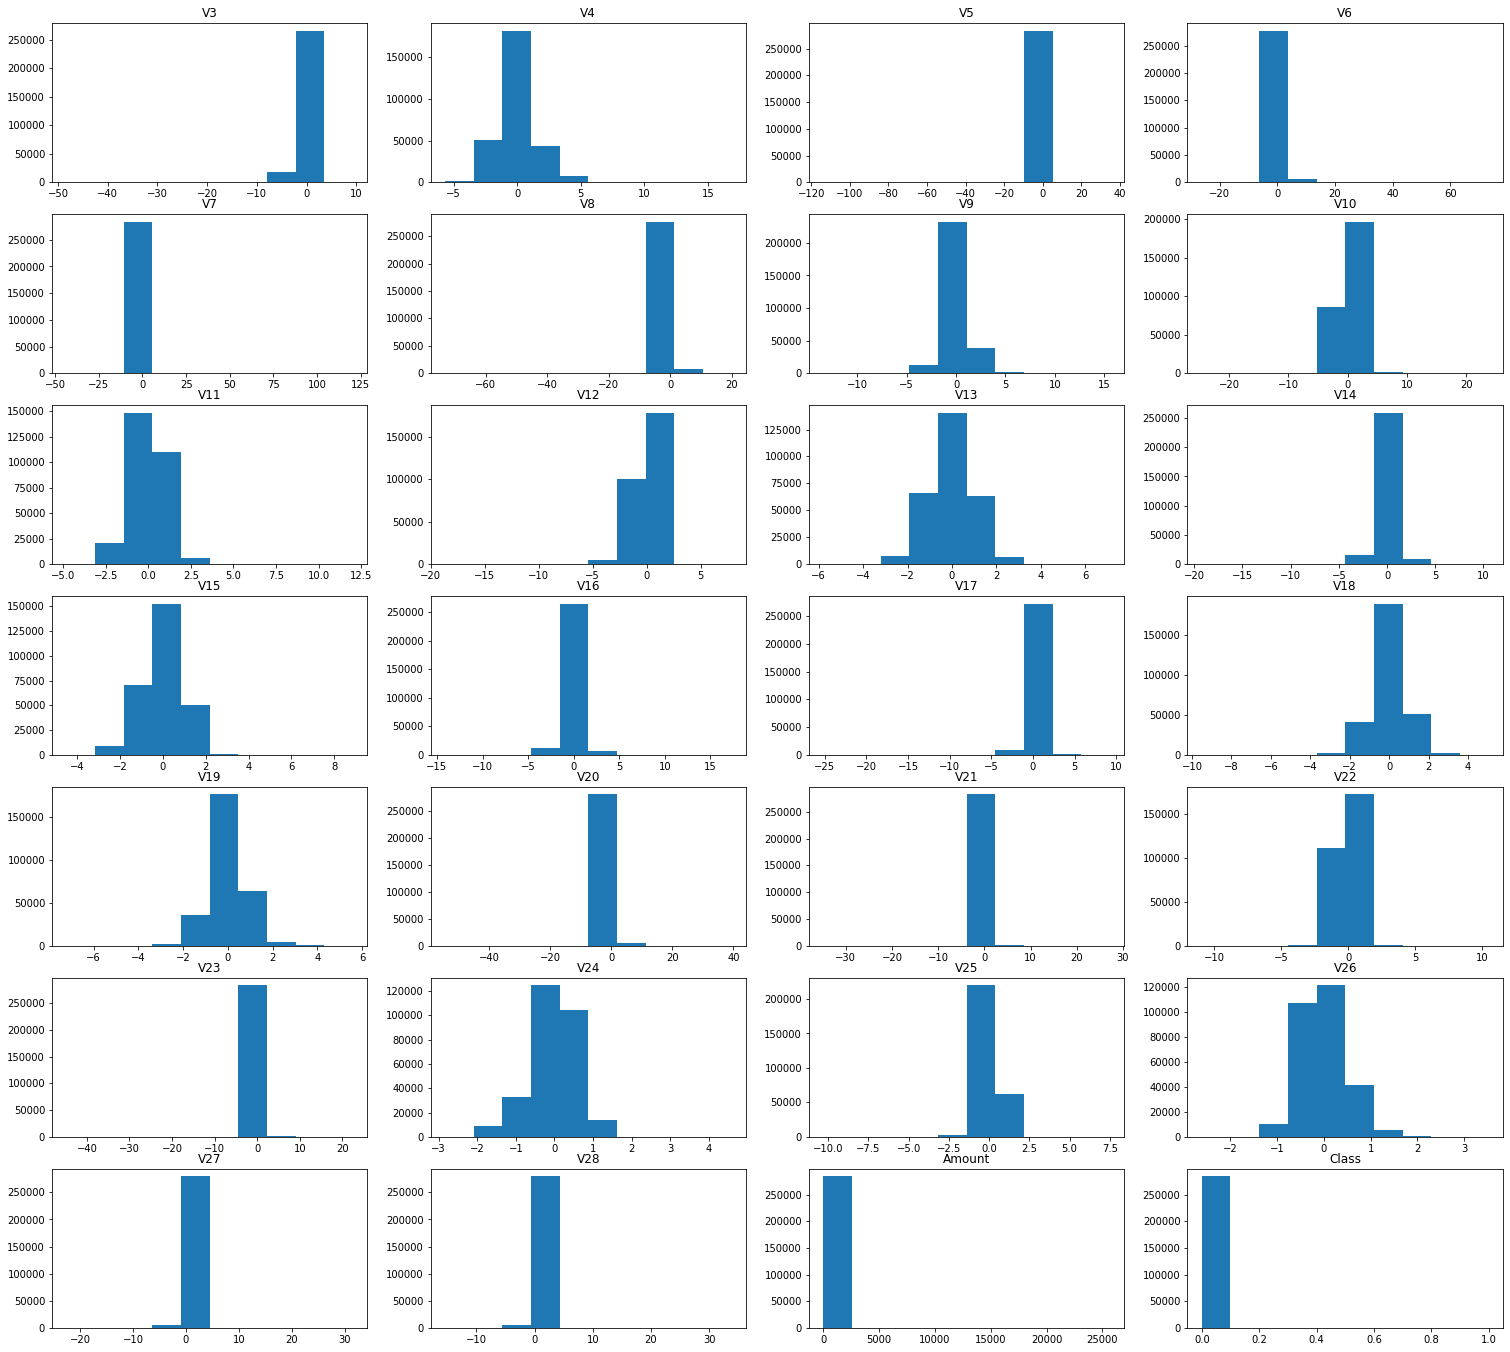

In [11]:
print('Original data distribution')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(data.columns)[2:30]):
    plt.subplot(7, 4, i + 1)
    plt.hist(data[col])
    plt.title(col)

__Fake data__

In [12]:
# fake data
synt_data_frame.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.000560,0.001572,-0.001093,0.001424,-0.002499,0.000494,0.000630,-0.001721,0.003519,-0.002097,...,0.000765,0.000023,0.000060,-0.000713,-0.000725,-0.000547,0.000804,0.000137,88.309681,0.001591
std,2.188092,1.895345,1.788007,1.666541,1.776807,1.653190,1.629453,1.467518,1.320320,1.279505,...,0.960163,1.040417,0.978232,0.918484,0.811598,0.756720,0.676481,0.540367,252.843283,0.039850
min,-87.032622,-149.610127,-82.508913,-73.875550,-211.199168,-202.294186,-275.178753,-117.698002,-28.405734,-44.308036,...,-50.468597,-56.890586,-80.396950,-14.311579,-43.332567,-21.360059,-113.099551,-45.155707,-2216.271759,0.000000
25%,-0.917693,-0.627917,-0.967079,-0.902098,-0.750769,-0.832952,-0.594255,-0.234601,-0.689808,-0.571086,...,-0.249868,-0.599820,-0.185086,-0.406397,-0.348032,-0.354753,-0.078253,-0.056778,5.658913,0.000000
50%,0.162696,0.064339,0.175457,-0.018008,-0.052849,-0.285197,0.043904,0.021422,-0.045330,-0.089236,...,-0.033788,-0.001390,-0.009566,0.049887,0.016758,-0.038557,0.001502,0.010967,22.007465,0.000000
75%,1.353905,0.828505,1.088597,0.802315,0.669237,0.479344,0.613611,0.364999,0.650857,0.505415,...,0.206836,0.590216,0.170689,0.504279,0.389360,0.280527,0.110400,0.086256,77.239004,0.000000
max,32.271310,39.252286,62.728369,34.255923,275.223988,139.448813,223.007200,64.767601,25.956984,40.871075,...,114.694239,20.161238,65.742342,22.970459,15.998053,15.164739,64.784632,61.449912,38171.482244,1.000000


Synthetic data distribution


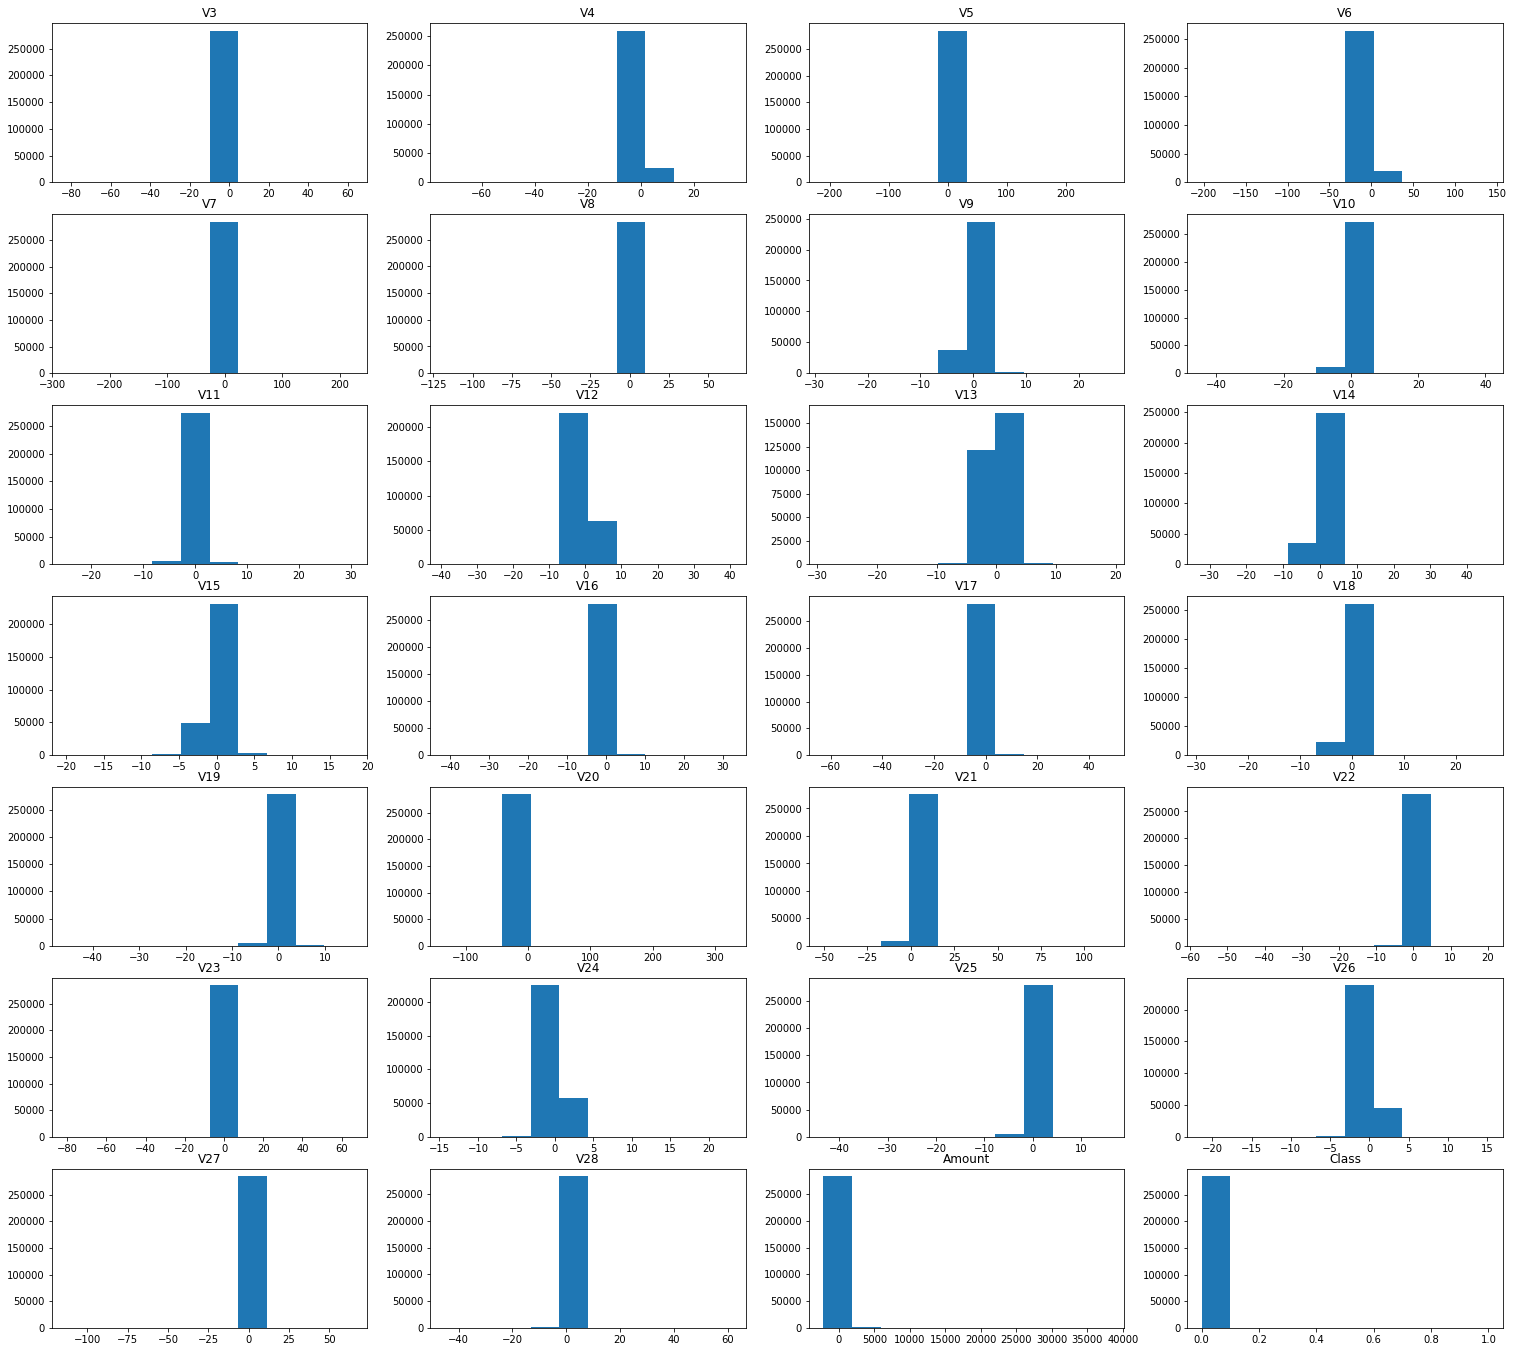

In [13]:
print('Synthetic data distribution')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(synt_data_frame.columns)[2:30]):
    plt.subplot(7, 4, i + 1)
    plt.hist(synt_data_frame[col])
    plt.title(col)

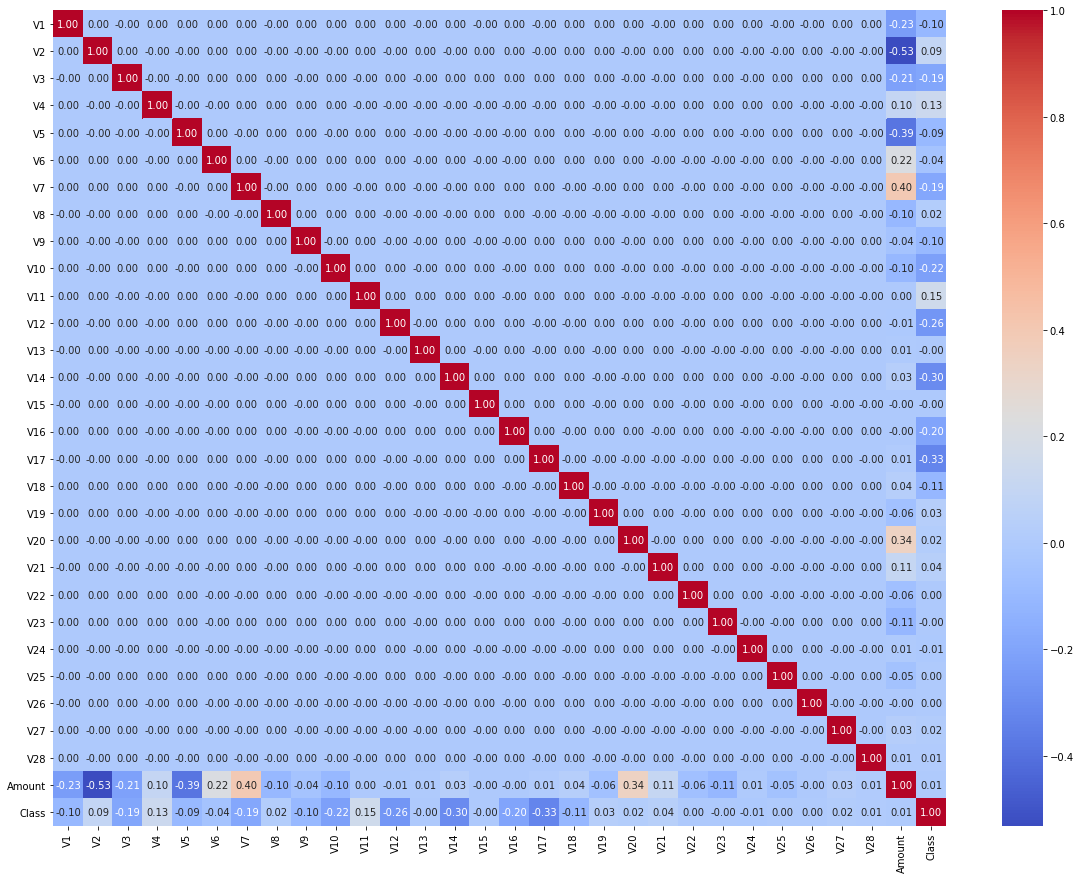

In [14]:
# real correlations
plt.subplots(figsize=(20,15))
g = sns.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

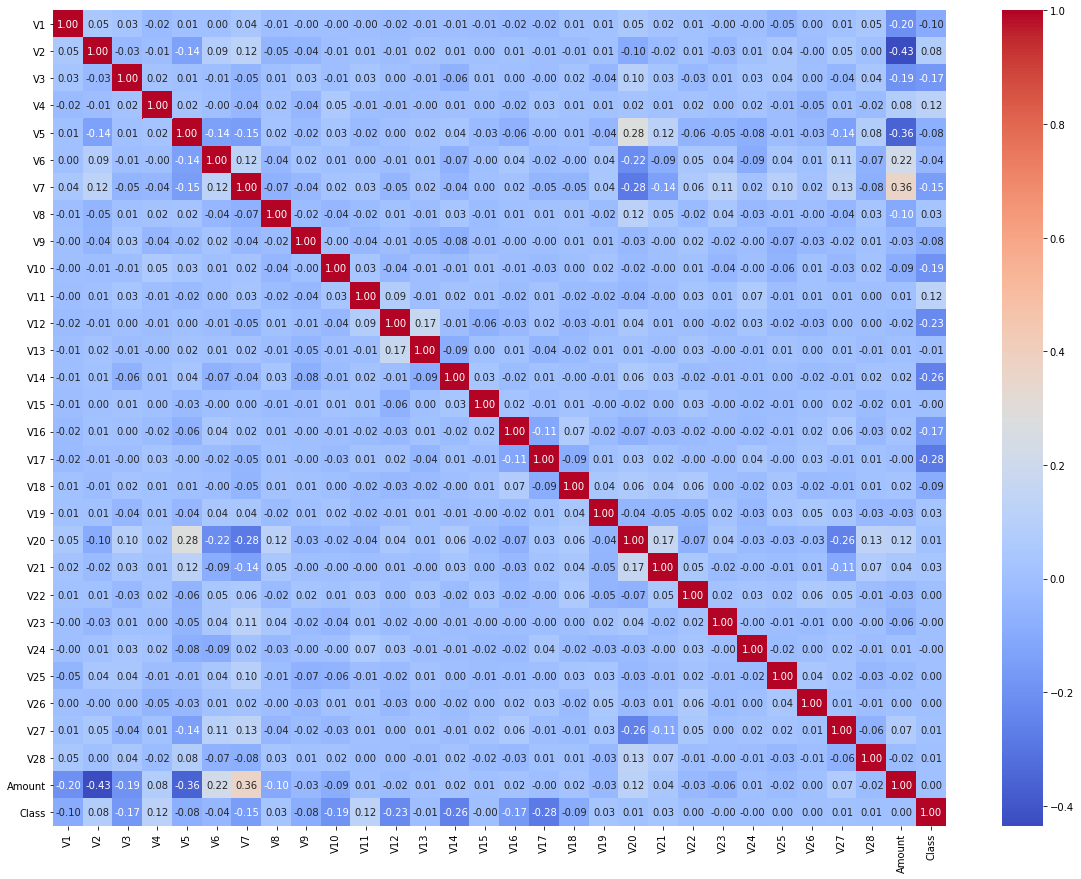

In [15]:
# fake correlations 
plt.subplots(figsize=(20,15))
g = sns.heatmap(synt_data_frame.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [16]:
y = data.Class
X = data.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

y_train_synt = synt_data_frame.Class
X_train_synt = synt_data_frame.drop(['Class'], axis=1)


In [17]:
forest_real = RandomForestClassifier()
forest_real.fit(X_train, y_train)
y_pred = forest_real.predict(X_test)
print("acc", metrics.roc_auc_score(y_test, y_pred))

/Users/mirayyuce/.virtualenvs/thesis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


acc 0.8855439828171779


In [18]:
forest_synt = RandomForestClassifier()
forest_synt.fit(X_train_synt, y_train_synt)
y_pred = forest_synt.predict(X_test)
print("acc", metrics.roc_auc_score(y_test, y_pred))

/Users/mirayyuce/.virtualenvs/thesis/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


acc 0.8686370338649239


In [21]:
# train and test using ONLY the real data
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("auc", metrics.roc_auc_score(y_test, y_pred))


auc 0.8219846607832796


In [22]:
# train on syntethic data and test on real data

knn_synt = KNeighborsClassifier(n_neighbors=10)
knn_synt.fit(X_train_synt, y_train_synt)
y_pred = knn_synt.predict(X_test)
print("auc", metrics.roc_auc_score(y_test, y_pred))


auc 0.8007982201053134
